***

### **Importante** 


- **Realice varios comentarios haciendo uso de una etiqueta html para darle color al comentario. Sin embargo, al subir mis notebooks a GITHUB las secciones donde realice los comentarios a color aparecen en blanco.**  

- **El "Enable Scrolling for Outputs" no se respeta al subir este contenido a GITHUB, por lo tanto, la impresión de los datos puede ser larga.**  

**Lo anterior no afecta en absoluto el contenido principal y el funcionamiento del documento, por lo que, si lo deseas, lo puedes ejecutar sin ningún problema en tu ordenador.**

***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image

Programamos el algortimo de entrenamiento *(el siguiente código esta específicamente diseñado para la arquitectura de red aquí presente)*:

In [2]:
def generador (x):
    """Esta función es un generador. Nos arroja el siguiente número cada que este es solicitado, lo que se traduce en un
    aprovechamiento correcto y eficaz de la memoria RAM. Por otro lado, cuando se hacen usos de listas, estas generan todo
    el conjunto de datos y lo cargan en memoria, lo que provoca que cuando una lista con una gran cantidad de elementos se
    crea, esta consuma gran cantidad de memoria RAM."""
    
    for i in range(x):
        
        yield i
        
def relu (x):
    """Esta función de activación retorna el valor entrante siempre y cuando este sea mayor a 0, de lo contario retorna 0."""
    
    arreglo_resultante = np.zeros(shape=x.shape)
    
    for i, suma_ponderada in enumerate(x):
        arreglo_resultante[i] = max(suma_ponderada,0)
        
    return arreglo_resultante

def derivada_relu (x):
    """Esta función devulve la derivada de la función relu para cada caso."""
    
    arreglo_resultante = np.zeros(shape=x.shape)
    
    for i, suma_ponderada in enumerate(x):
        if suma_ponderada > 0:
            arreglo_resultante[i] = 1
        else:
            arreglo_resultante[i] = 0
        
    return arreglo_resultante

def algoritmo_entrenamiento (entradas, salidas_deseadas, pesos, alfa, epocas):
    """Esta función se encarga de ejecutar el algoritmo de entrenamiento de nuestra red neuronal."""
    
    pesos_ = [pesos_x_capa.copy() for pesos_x_capa in pesos]
    
    error_deseado = float(input("\nHola ¿Cuál es el error que mínimo que deseas para la red neuronal?: "))
    
    error_red = list()
    
    for epoca in generador(epocas):
        
        error_x_entrada = 0
        
        for entrada, salida_deseada in zip(entradas, salidas_deseadas.T):
                
            # 1. Propagación hacia adelante (Forward-Propagation).
            
            neuronas_capa_1 = relu(entrada.dot(pesos_[0])) # Producto punto entre las neuronas de entrada y los pesos de la capa 1.
            neurona_de_salida = neuronas_capa_1@pesos_[1] # Producto punto entre las neuronas de la capa 1 y los pesos de la capa 2.
            # La suma ponderada realizada en la neurona de salida es la predicción.
            
            # 2. Calculamos el error de salida de nuestra red.
            
            # El error a usarse sigue siendo el Error Cuadrático (EC):
            error = (neurona_de_salida - salida_deseada)**2
            error_x_entrada += error # Sumamos los errores en la red correspondientes a la predicción de cada entrada.
            
            # 3. Propagamos el error de la red hacia atrás (Backpropagation), es decir, comienza el aprendizaje de nuestra red.
            # Primero calculamos las deltas de cada nuerona y despues los pesos delta.
            
            # Descenso del Gradiente para la actualización de los pesos de la capa 2:
            delta_ns = 2*(neurona_de_salida - salida_deseada)*1 # Dado que sólo tengo una neurona de salida, sólo habrá un delta.
            pesos_delta_ns = delta_ns * neuronas_capa_1 # ns significa neurona de salida.
            
            # Descenso del Gradiente para la actualización de los pesos de la capa 1:
            deltas_c1 = 2*(neurona_de_salida - salida_deseada)*1 * pesos_[1].T * derivada_relu(entrada.dot(pesos_[0]))
            pesos_delta_c1 = np.asarray([[delta*elemento for elemento in entrada] for delta in deltas_c1[0]]) # c1 significa capa 1.
            
            # 4. Actualizamos los parámetros de nuestra red.
            
            # Actualización de pesos capa 2:
            pesos_[1] -= alfa*np.array([pesos_delta_ns]).T
            
            # Actualización de pesos capa 1:
            pesos_[0] -= alfa*pesos_delta_c1.T
            
        error_x_epoca = (error_x_entrada[0]/len(entradas))*100 # ECM dado en porcentaje en D. Entrenamiento.
        error_red.append(error_x_epoca)
        print(f"Error Total de la Red en la Época {epoca+1}: {np.around(error_x_epoca,10)}%\n") # Redondeamos el error hasta el 10mo decimal.
        
        if error_x_epoca <= error_deseado:
            print("\nEl error de la red neuronal es menor o igual al error deseado.\n")
            break
        
    return pesos_, error_red

<font color="red">**Cuando se realiza la backpropagation (descenso del gradiente), los parámetros se actualizan una vez se han calculado todas las deltas (como se aprecia en el orden seguido por la función "algoritmo_entrenamiento"). De lo contrario, no estaríamos actualizando respecto del mismo error de salida, lo que se traduce en un algoritmo incorrecto de aprendizaje.**</font>

In [3]:
def suma_ponderada(pesos,entradas):
    
    vector_prediccion = list()
    
    for entrada in entradas:
        neuronas_capa_1 = relu(entrada.dot(pesos[0]))
        neurona_de_salida = neuronas_capa_1@pesos[1]
        vector_prediccion.append(np.around(float(neurona_de_salida),decimals=3))
            
    return vector_prediccion

La arquitectura de red es la siguiente **(las neuronas de la capa 1 son NO-LINEALES)**:

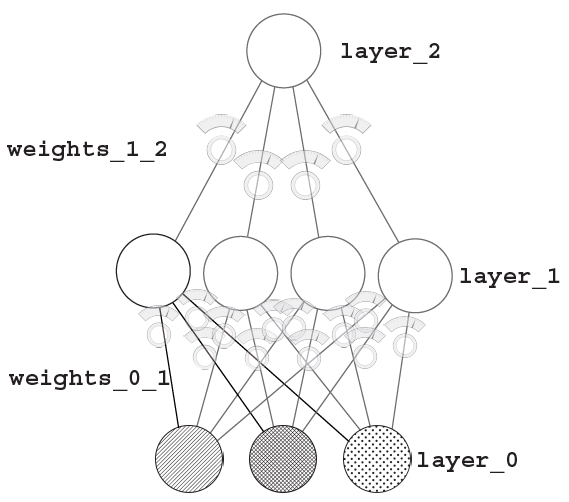

In [4]:
Red_3Capas = Image.open("Red_3_Capas.PNG").convert("RGB")
Red_3Capas

*Para la NO-LINEALIDAD aplicada en las neuronas de la capa 1, se incluyo la función de activación RELU. Más adelante hablaremos en detalle sobre estas.*

Declaramos las entradas y salidas deseadas:

In [5]:
Entradas = np.array([[1,0,1],[0,1,1,],[0,0,1],[1,1,1]])
print(Entradas)

[[1 0 1]
 [0 1 1]
 [0 0 1]
 [1 1 1]]


In [6]:
salidas_deseadas = np.array([1,1,0,0])
salidas_deseadas.reshape(-1,1)

array([[1],
       [1],
       [0],
       [0]])

Declaramos los hyperparámetros restantes:

In [11]:
alfa = 0.2
epocas = 100
neuronas_capa_0 = 3 # Neuronas de Entrada.
neuronas_capa_1 = 4
neurona_de_salida = 1

np.random.seed(10)
pesos_capa1 = 2*np.random.random((neuronas_capa_0,neuronas_capa_1)) - 1
pesos_capa2 = 2*np.random.random((neuronas_capa_1,neurona_de_salida)) - 1
pesos_capas = [pesos_capa1,pesos_capa2]

pesos_entrenados, error_red = algoritmo_entrenamiento(Entradas, salidas_deseadas, pesos_capas, alfa, epocas)


Hola ¿Cuál es el error que mínimo que deseas para la red neuronal?:  0


Error Total de la Red en la Época 1: 35.3766476795%

Error Total de la Red en la Época 2: 52.5786670967%

Error Total de la Red en la Época 3: 45.6902680526%

Error Total de la Red en la Época 4: 32.6343430108%

Error Total de la Red en la Época 5: 32.0009361449%

Error Total de la Red en la Época 6: 25.5566254834%

Error Total de la Red en la Época 7: 22.4120176072%

Error Total de la Red en la Época 8: 20.6796353129%

Error Total de la Red en la Época 9: 19.6221761458%

Error Total de la Red en la Época 10: 21.7372335939%

Error Total de la Red en la Época 11: 15.8411229649%

Error Total de la Red en la Época 12: 13.7546524322%

Error Total de la Red en la Época 13: 11.4100372841%

Error Total de la Red en la Época 14: 8.8472874025%

Error Total de la Red en la Época 15: 6.2175171774%

Error Total de la Red en la Época 16: 3.7850922048%

Error Total de la Red en la Época 17: 1.8768466306%

Error Total de la Red en la Época 18: 0.7111273534%

Error Total de la Red en la Época 19: 0.20

In [12]:
suma_ponderada(pesos_entrenados, Entradas)

[1.0, 1.0, 0.0, 0.0]

**La Backpropagation sirve para conocer de que manera contribuye cada parámetro al error total de la red, y de esta forma actualizarlos con la finalidad de reducir el error de la red.**  

<font color="red">**Las capas intermedias crean correlaciones entra las entradas y sus salidas facilitando el aprendizaje.**</font>